# Setting Up

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import scipy as stats

sns.set(color_codes=True)
sns.set_style("dark")
sns.set_context("poster")
matplotlib.rcParams['text.color'] = 'white'

monster = "seara"
filename = monster + "_20200907.csv"

max_skills = [4, 5, 5]

df = pd.read_csv(filename)
df_full = pd.read_csv(filename)
df_full = df_full[df_full["Stars"] == 6]
print(df.columns)
runes_cols = ["Slot" + str(i) for i in range(1 ,7)]
df.dropna(subset=runes_cols, how='any', inplace=True) # delete without runes
df.sort_values(["Eff"], ascending=False, inplace=True)
df

Index(['Level', 'Stars', 'HP', 'Attack', 'Defense', 'Speed', 'Res', 'Acc',
       'CRate', 'CDmg', 'Eff', 'Eff.HP', 'Sets', 'Skillups', 'Acquired',
       'Slot1', 'Slot2', 'Slot3', 'Slot4', 'Slot5', 'Slot6'],
      dtype='object')


,Level,Stars,HP,Attack,Defense,Speed,Res,Acc,CRate,CDmg,...,Eff.HP,Sets,Skillups,Acquired,Slot1,Slot2,Slot3,Slot4,Slot5,Slot6
0,40,6,34336,2139,1507,232,15,87,21,50,...,220248,Violent + Will,"[4, 5, 5]",2018-03-20,ATK+,SPD,DEF+,ATK%,HP+,HP%
1,40,6,38585,1819,1532,245,15,67,26,50,...,250879,Violent + Will,"[4, 5, 5]",2017-02-28,ATK+,SPD,DEF+,HP%,HP+,HP%
2,40,6,33768,2563,1378,208,19,84,41,50,...,201359,Violent + Will,"[4, 5, 5]",2017-08-06,ATK+,ATK%,DEF+,ATK%,HP+,HP%
3,40,6,36232,2011,1470,209,15,50,82,50,...,227718,Tolerance + Violent,"[4, 5, 5]",2017-03-16,ATK+,SPD,DEF+,HP%,HP+,HP%
4,40,6,32464,1813,1360,234,15,60,101,64,...,191538,Violent + Will,"[4, 5, 5]",2019-06-04,ATK+,SPD,DEF+,CRate%,HP+,HP%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638,40,6,16238,1711,794,183,22,51,30,67,...,63636,Focus + Violent,"[4, 5, 5]",2015-02-08,ATK+,SPD,DEF+,ATK%,HP+,ATK%
639,40,6,18703,1865,911,119,37,39,79,59,...,80955,Energy + Violent,"[4, 5, 5]",2015-11-13,ATK+,ATK%,DEF+,CRate%,HP+,ATK%
640,40,6,14680,1828,764,169,34,84,33,57,...,55989,Focus + Violent,"[4, 5, 5]",2016-07-04,ATK+,SPD,DEF+,ATK%,HP+,ATK%
641,40,6,16603,1387,740,139,29,35,56,82,...,61929,Fatal + Revenge,"[1, 1, 1]",2020-02-19,ATK+,SPD,DEF+,CRate%,HP+,ATK%


# Stars Distribution, picking 6*

(608, 21)


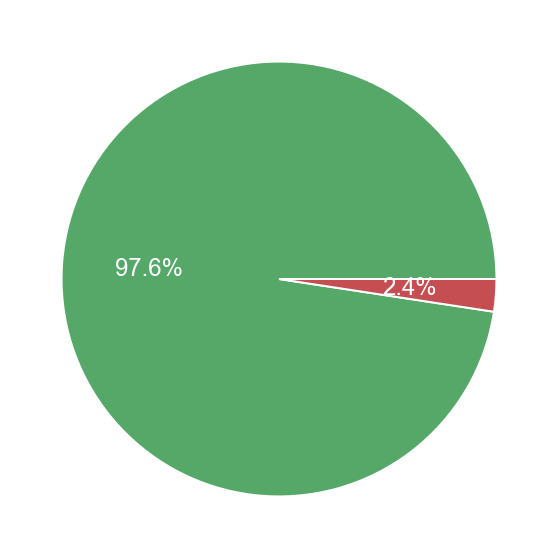

In [2]:
fig = plt.figure(figsize=(10, 10))
stars = df["Stars"].value_counts()
plt.pie(stars, labels=stars.index, autopct='%1.1f%%', colors=['g', 'r', 'b'])
plt.savefig(monster + "_pie_6stars.png", transparent=True, bbox_inches = "tight")
df_stars6 = df[df["Stars"] == 6] # pick only 6*
print(df_stars6.shape)

# Runes 

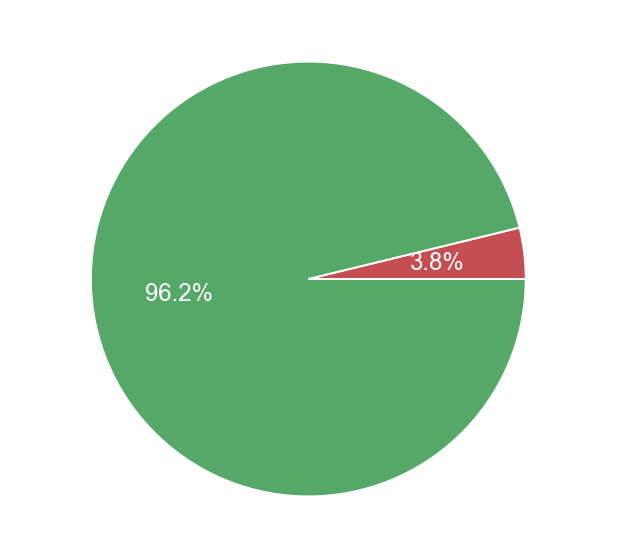

In [3]:
fig = plt.figure(figsize=(10, 10))
df_runes = {
    'Without\nRunes': df_full.shape[0] - df_stars6.shape[0],
    'With\nRunes': df_stars6.shape[0],
}
plt.pie(df_runes.values(), labels=df_runes.keys(), autopct='%1.1f%%', colors=['r', 'g'])
plt.savefig(monster + "_pie_runes.png", transparent=True, bbox_inches = "tight")
plt.show()

# Skilled Up

{'All': 523, 'None': 55, '2nd & 3rd': 11}


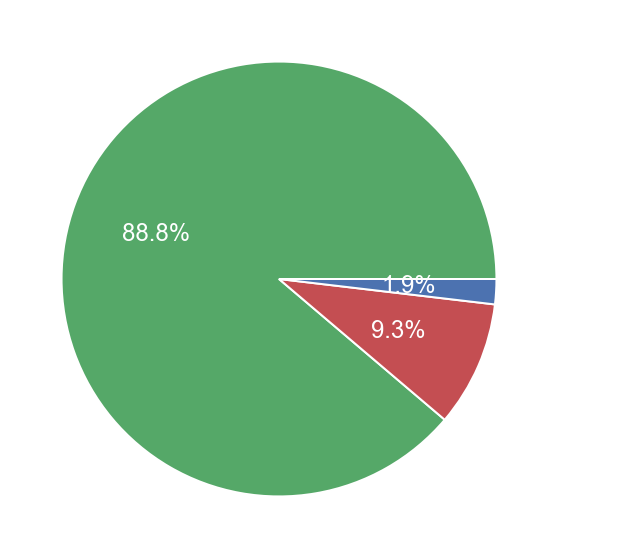

In [4]:
skills_count = {}

for value, count in df_stars6['Skillups'].value_counts().items():
    skillups = eval(value)
    if skillups == max_skills:
        skills_count['All'] = count
    elif skillups[:2] == max_skills[:2] and count > 5:
        skills_count['1st & 2nd'] = count
    elif [skillups[0], skillups[2]] == [max_skills[0], max_skills[2]] and count > 5:
        skills_count['1st & 3rd'] = count
    elif skillups[1:] == max_skills[1:] and count > 5:
        skills_count['2nd & 3rd'] = count
    elif skillups[0] == max_skills[0] and count > 5:
        skills_count['Only 1st'] = count
    elif skillups[1] == max_skills[1] and count > 5:
        skills_count['Only 2nd'] = count
    elif skillups[2] == max_skills[2] and count > 5:
        skills_count['Only 3rd'] = count
    else:
        if 'None' not in skills_count.keys():
            skills_count['None'] = 0
        skills_count['None'] += count

print(skills_count)
fig = plt.figure(figsize=(10, 10))
plt.pie(list(skills_count.values()), labels=skills_count.keys(), autopct='%1.1f%%', colors=['g', 'r', 'b'])
plt.savefig(monster + "_pie_skillups.png", transparent=True, bbox_inches = "tight")
plt.show()

# Eff. HP Distribution

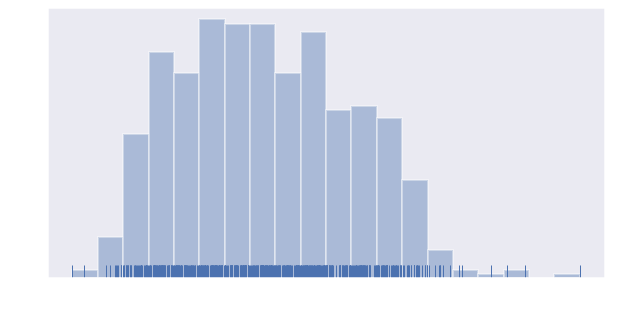

In [5]:
fig = plt.figure(figsize=(10, 5))
sns.distplot(df_stars6["Eff.HP"], bins=20, kde=False, rug=True).set_xlabel(None)
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_dist_effhp.png", transparent=True, bbox_inches = "tight")

# HP Distribution

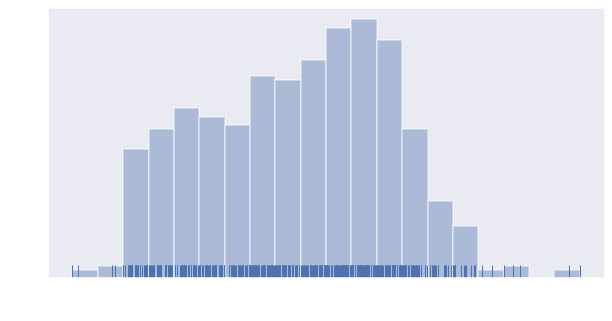

In [6]:
fig = plt.figure(figsize=(10, 5))
sns.distplot(df_stars6["HP"], bins=20, kde=False, rug=True).set_xlabel(None)
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_dist_hp.png", transparent=True, bbox_inches = "tight")

# Attack Distribution

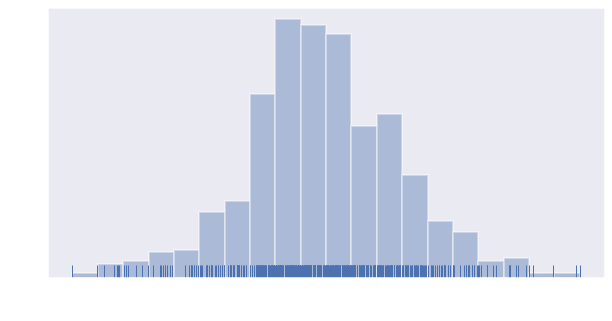

In [7]:
fig = plt.figure(figsize=(10, 5))
sns.distplot(df_stars6["Attack"], bins=20, kde=False, rug=True).set_xlabel(None)
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_dist_attack.png", transparent=True, bbox_inches = "tight")

# Critical Rate Distribution

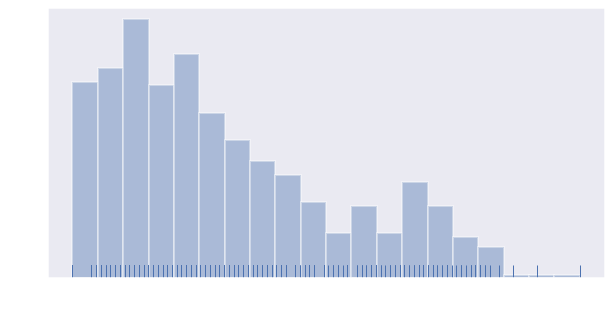

In [8]:
fig = plt.figure(figsize=(10, 5))
sns.distplot(df_stars6["CRate"], bins=20, kde=False, rug=True).set_xlabel(None)
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_dist_critrate.png", transparent=True, bbox_inches = "tight")

# Critical Damag Distribution

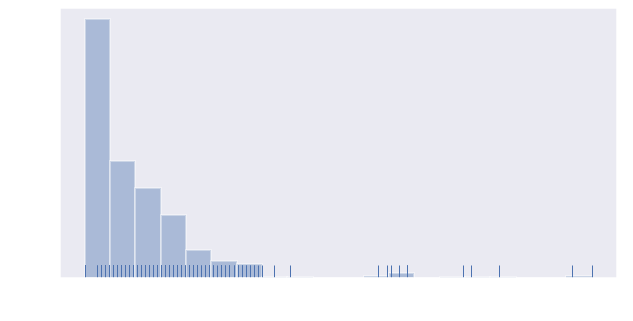

In [9]:
fig = plt.figure(figsize=(10, 5))
sns.distplot(df_stars6["CDmg"], bins=20, kde=False, rug=True).set_xlabel(None)
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_dist_critdmg.png", transparent=True, bbox_inches = "tight")

# Defense Distribution

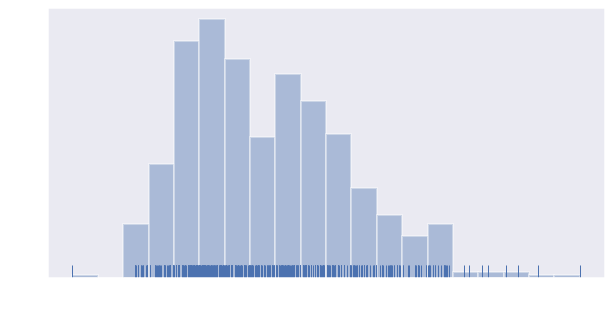

In [10]:
fig = plt.figure(figsize=(10, 5))
sns.distplot(df_stars6["Defense"], bins=20, kde=False, rug=True).set_xlabel(None)
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_dist_defense.png", transparent=True, bbox_inches = "tight")

# Avg. Rune Distribution

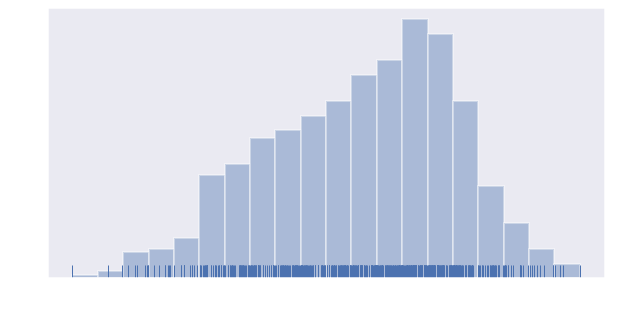

In [11]:
fig = plt.figure(figsize=(10, 5))
sns.distplot(df_stars6["Eff"], bins=20, kde=False, rug=True).set_xlabel(None)
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_dist_rune_eff.png", transparent=True, bbox_inches = "tight")

# Accuracy Distribution

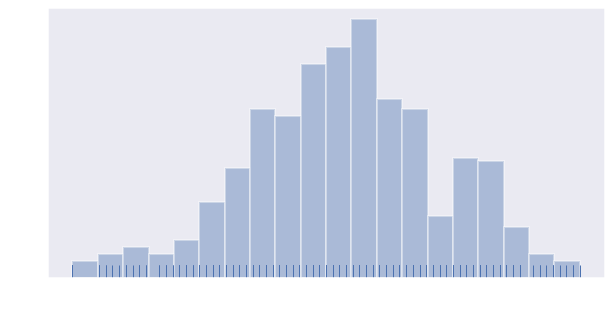

In [12]:
fig = plt.figure(figsize=(10, 5))
sns.distplot(df_stars6["Acc"], bins=20, kde=False, rug=True).set_xlabel(None)
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_dist_acc.png", transparent=True, bbox_inches = "tight")

# Resistance Distribution

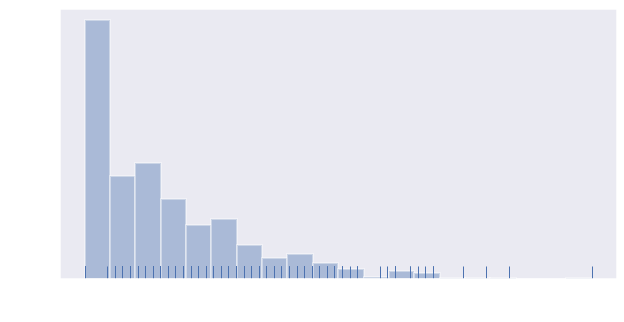

In [13]:
fig = plt.figure(figsize=(10, 5))
sns.distplot(df_stars6["Res"], bins=20, kde=False, rug=True).set_xlabel(None)
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_dist_res.png", transparent=True, bbox_inches = "tight")

# Sets

Violent + Will       401
Focus + Violent       42
Violent               33
Blade + Violent       25
Revenge + Violent     24
Energy + Violent      15
Fatal + Will           6
Endure + Violent       4
Fatal + Focus          4
Name: Sets, dtype: int64


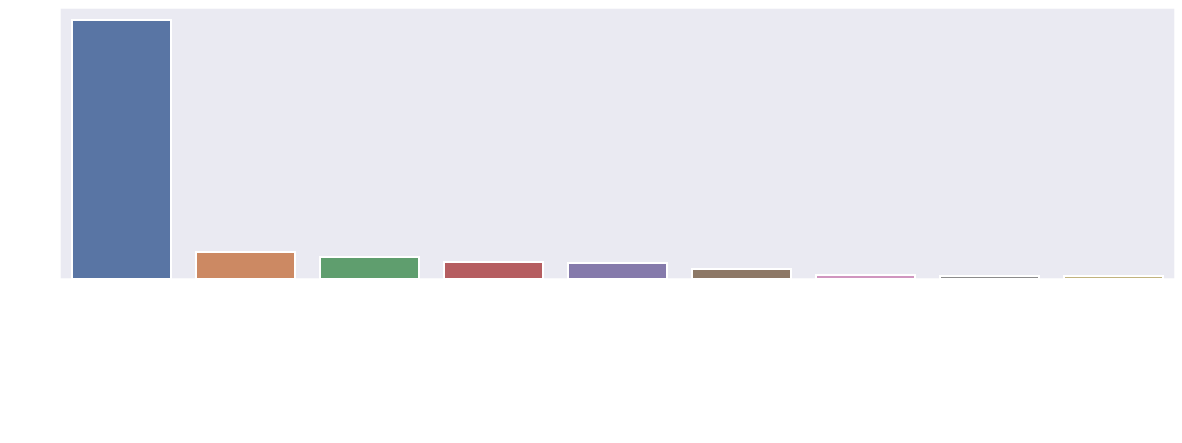

In [14]:
fig = plt.figure(figsize=(20, 5))
counts = df_stars6["Sets"].value_counts()
counts = counts[counts > 3]
print(counts)
x, y = counts.index, counts.values
sets = sns.barplot(x=x, y=y)
_ = sets.set_xticklabels(sets.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_dist_sets.png", transparent=True, bbox_inches = "tight")

# 4-Rune Sets

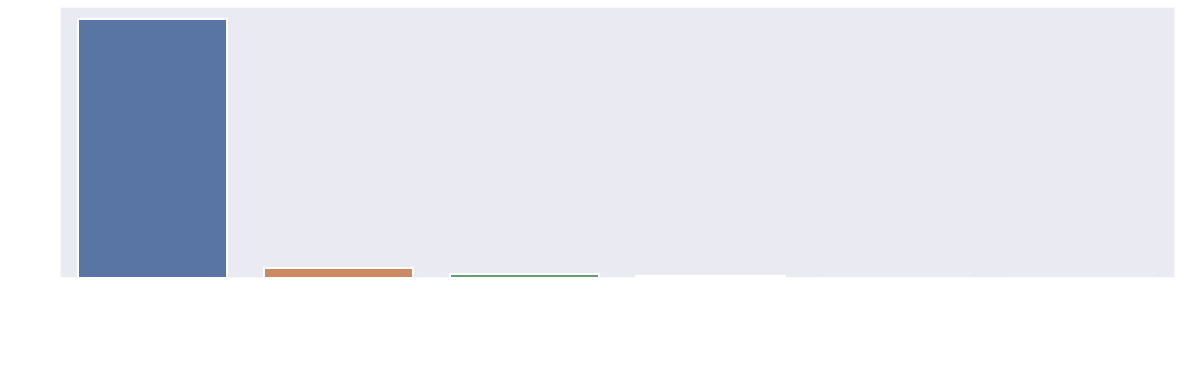

In [15]:
sets_4 = ['Violent', 'Swift', 'Rage', 'Fatal', 'Despair', 'Vampire']
fig = plt.figure(figsize=(20, 5))
counts = df_stars6["Sets"].value_counts()
set_sum = dict()
for set_4 in sets_4:
    indexes = [val for val in counts.index if set_4 in val]
    set_count = counts.loc[indexes]
    set_sum[set_4] = set_count.sum()
set_sum = {k: v for k, v in sorted(set_sum.items(), key=lambda item: item[1], reverse=True)}
x, y = list(set_sum.keys()), list(set_sum.values())
sets = sns.barplot(x=x, y=y)
_ = sets.set_xticklabels(sets.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_dist_4sets.png", transparent=True, bbox_inches = "tight")

# Speed Distribution

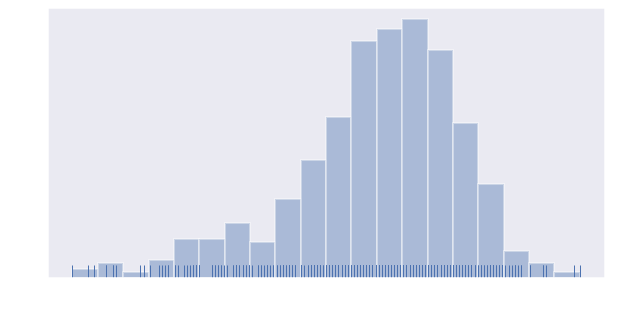

In [16]:
fig = plt.figure(figsize=(10, 5))
sns.distplot(df_stars6["Speed"], bins=20, kde=False, rug=True).set_xlabel(None)
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_dist_speed.png", transparent=True,  bbox_inches = "tight")

# Average & Best by Category

In [17]:
cols = ['HP', 'Attack', 'Defense', 'Speed', 'Res', 'Acc', 'CRate', 'CDmg', 'Eff', 'Eff.HP']
df_best = pd.DataFrame(columns=["ID"] + cols)
df_best.set_index("ID", drop=True, inplace=True)

display(df_stars6[cols].describe())

,HP,Attack,Defense,Speed,Res,Acc,CRate,CDmg,Eff,Eff.HP
count,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000
mean,25205.993421,2097.314145,1009.327303,203.965461,25.340461,65.682566,47.131579,62.404605,90.909934,119322.907895
std,5796.273609,338.357709,166.907899,27.474723,11.077273,14.523612,23.910441,15.376573,11.763889,36334.020757
min,11184.000000,1009.000000,603.000000,106.000000,15.000000,25.000000,15.000000,50.000000,54.810000,37481.000000
25%,20477.750000,1898.750000,874.750000,190.000000,15.000000,56.000000,28.000000,50.000000,82.437500,90813.750000
50%,25938.000000,2081.000000,985.000000,208.000000,22.000000,66.000000,41.000000,58.500000,92.655000,117426.500000
75%,29584.250000,2315.500000,1120.000000,223.000000,31.000000,76.000000,62.000000,67.250000,99.830000,145431.000000
max,42724.000000,3208.000000,1661.000000,270.000000,82.000000,101.000000,122.000000,176.000000,118.330000,250879.000000


# Best 10 Builds by Avg Eff

In [18]:
print(df_stars6.drop(['Acquired', 'Slot1', 'Slot3', 'Slot5', 'Level', 'Stars', 'Skillups'], axis=1).reset_index(drop=True).sort_values(['Eff'], ascending=False).head(10).to_html())

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>HP</th>
      <th>Attack</th>
      <th>Defense</th>
      <th>Speed</th>
      <th>Res</th>
      <th>Acc</th>
      <th>CRate</th>
      <th>CDmg</th>
      <th>Eff</th>
      <th>Eff.HP</th>
      <th>Sets</th>
      <th>Slot2</th>
      <th>Slot4</th>
      <th>Slot6</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>34336</td>
      <td>2139</td>
      <td>1507</td>
      <td>232</td>
      <td>15</td>
      <td>87</td>
      <td>21</td>
      <td>50</td>
      <td>118.33</td>
      <td>220248</td>
      <td>Violent + Will</td>
      <td>SPD</td>
      <td>ATK%</td>
      <td>HP%</td>
    </tr>
    <tr>
      <th>1</th>
      <td>38585</td>
      <td>1819</td>
      <td>1532</td>
      <td>245</td>
      <td>15</td>
      <td>67</td>
      <td>26</td>
      <td>50</td>
      <td>116.26</td>
      <td>250879</td>
      <td>Violent + Will</td>
      <td>S

# Most common Builds

{'build': ['SPD/ATK%/HP%', 'SPD/ATK%/ATK%', 'HP%/ATK%/ATK%', 'SPD/CRate%/HP%', 'ATK%/ATK%/ATK%', 'HP%/ATK%/HP%', 'SPD/CRate%/ATK%', 'SPD/HP%/HP%', 'ATK%/CRate%/HP%', 'SPD/CDmg%/ATK%'], 'count': [191, 148, 55, 52, 45, 29, 22, 18, 11, 5]}


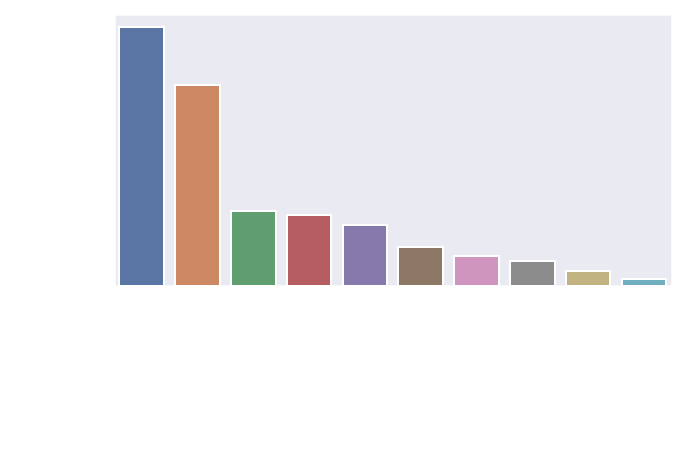

In [31]:
fig = plt.figure(figsize=(10, 5))

builds_count = df_stars6.groupby(["Slot2", "Slot4", "Slot6"]).size().reset_index(name='Count')
builds_count = builds_count.sort_values(["Count"], ascending=False) # single builds to drop
builds_count_to_plot = builds_count.set_index(["Slot2", "Slot4", "Slot6"]).T

builds_count_proper = dict()
for row in builds_count.values.tolist():
    set_temp = row[:3]
    set_temp.sort()
    set_temp_txt = '/'.join(set_temp)
    if set_temp_txt not in builds_count_proper:
        builds_count_proper[set_temp_txt] = {
            'build': '/'.join(row[:3]),
            'count': 0,
        }
    builds_count_proper[set_temp_txt]['count'] += row[3]

builds_count_final = list()
for b in builds_count_proper.values():
    if b['count'] < 5:
        continue
    builds_count_final.append(b)
    
builds_count = sorted(builds_count_final, key=lambda k: k['count'], reverse=True)
builds_count = {k: [dic[k] for dic in builds_count] for k in builds_count[0]}
print(builds_count)

builds_common = sns.barplot(x=builds_count['build'], y=builds_count['count'])
_ = builds_common.set_xticklabels(builds_common.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_build_common.png", transparent=True, bbox_inches = "tight")

# Most frequent slot 2

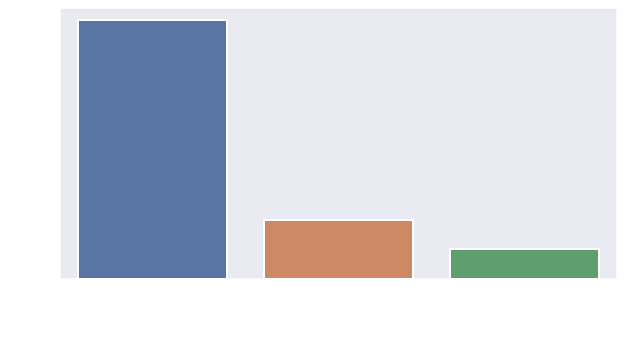

In [20]:
fig = plt.figure(figsize=(10, 5))

counts_slot2 = df_stars6["Slot2"].value_counts()
counts_slot2 = counts_slot2[counts_slot2 > 2]
x, y = counts_slot2.index, counts_slot2.values
slot2 = sns.barplot(x=x, y=y)
_ = slot2.set_xticklabels(slot2.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_slot_2.png", transparent=True, bbox_inches = "tight")

# Most frequent slot 4

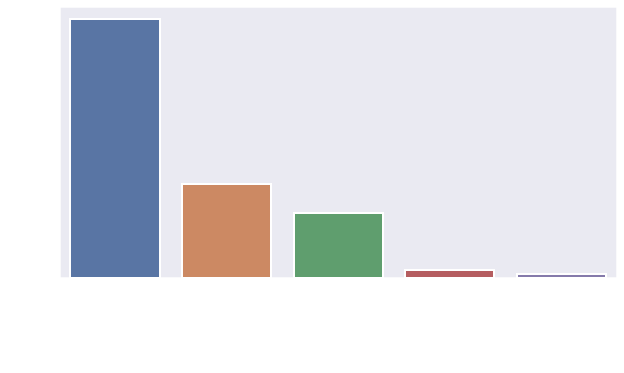

In [21]:
fig = plt.figure(figsize=(10, 5))

counts_slot4 = df_stars6["Slot4"].value_counts()
counts_slot4 = counts_slot4[counts_slot4 > 2]
x, y = counts_slot4.index, counts_slot4.values
slot4 = sns.barplot(x=x, y=y)
_ = slot4.set_xticklabels(slot4.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_slot_4.png", transparent=True, bbox_inches = "tight")

# Most frequent slot 6

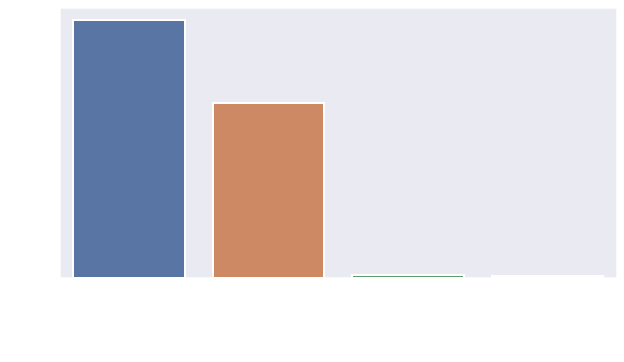

In [22]:
fig = plt.figure(figsize=(10, 5))

counts_slot6 = df_stars6["Slot6"].value_counts()
counts_slot6 = counts_slot6[counts_slot6 > 2]
x, y = counts_slot6.index, counts_slot6.values
slot6 = sns.barplot(x=x, y=y)
_ = slot6.set_xticklabels(slot6.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_slot_6.png", transparent=True, bbox_inches = "tight")